In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/placement_data.csv")

In [ ]:
df.head()

,iq,cgpa,placement
0,131,8.61,1
1,94,6.18,0
2,140,6.28,0
3,100,5.20,0
4,103,8.55,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iq         100 non-null    int64  
 1   cgpa       100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [ ]:
df.shape

(100, 3)

### Data Pre-processing

In [ ]:
# To Remove any extra columns (not required here)
# This removes the FIRST column

# df = df.iloc[:,1:]
# df.head()

### Explorartory Data Analysis

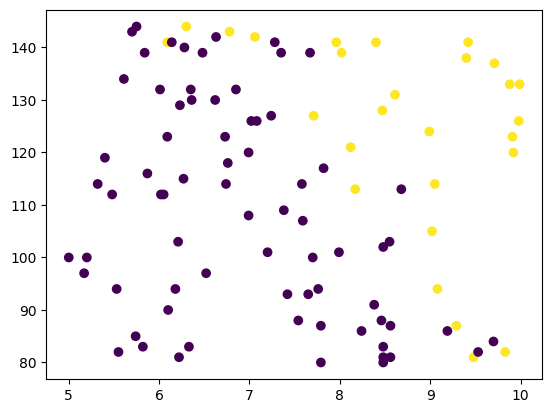

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

### Extracting Input & Output Columns

In [ ]:
X = df.iloc[:,0:2]
X

,iq,cgpa
0,131,8.61
1,94,6.18
2,140,6.28
3,100,5.20
4,103,8.55
...,...,...
95,114,7.58
96,144,6.30
97,126,9.98
98,82,9.83


In [ ]:
Y = df.iloc[:,-1]
Y.shape

(100,)

### Train Test Split

In [ ]:
# Library
from sklearn.model_selection import train_test_split

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.1)

In [ ]:
X_Train

,iq,cgpa
16,137,9.71
25,126,7.08
87,91,8.38
33,100,5.00
70,108,6.99
...,...,...
68,139,7.35
1,94,6.18
14,100,7.70
80,114,9.05


### Scaling

In [ ]:
# Library for scaling
from sklearn.preprocessing import  StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_Train = scaler.fit_transform(X_Train)

In [ ]:
X_Train

array([[ 1.13732658,  1.59708425],
       [ 0.61142592, -0.28422282],
       [-1.06189437,  0.64570083],
       [-0.63161201, -1.77210065],
       [-0.2491388 , -0.34860215],
       [-0.01009304,  0.8602986 ],
       [-0.29694795,  0.08059338],
       [-0.39256625,  1.1035094 ],
       [-1.25313097,  0.77445949],
       [-0.63161201, -1.62903548],
       [-0.05790219, -1.04246825],
       [-0.53599371,  0.71723342],
       [ 0.51580762,  1.08204962],
       [ 0.85047168,  0.81022578],
       [ 1.23294489, -0.71341835],
       [-1.30094012,  1.2251148 ],
       [-1.44436758, -0.82071723],
       [ 0.46799847,  1.74014943],
       [-0.91846691, -1.39297794],
       [-0.48818455,  0.76730623],
       [ 0.32457101,  1.74730269],
       [ 0.89828083, -1.04962151],
       [-1.53998588,  0.77445949],
       [-0.91846691,  0.20219878],
       [-1.25313097,  1.29664738],
       [ 0.99389913, -1.33575187],
       [ 0.70704422,  0.71008016],
       [-1.49217673,  1.4683256 ],
       [ 1.32856319,

In [ ]:
X_Test = scaler.transform(X_Test)

In [ ]:
X_Test

array([[-0.96627607,  0.12351294],
       [-1.30094012,  0.54555521],
       [-1.53998588, -0.89940308],
       [ 0.46799847, -0.99239544],
       [ 0.65923507,  0.16643249],
       [ 0.80266253, -0.61327272],
       [ 1.28075404, -0.85648352],
       [ 0.08552526, -0.86363678],
       [ 0.13333441, -1.14976714],
       [-1.58779503,  0.71723342]])

### Training Model

In [ ]:
# Library to model training
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
#model training
clf.fit(X_Train, Y_Train)

LogisticRegression()

In [ ]:
Y_Pred = clf.predict(X_Test)

In [ ]:
Y_Test

,placement
60,0
32,0
41,0
43,0
90,1
27,0
2,0
47,0
93,0
75,0


In [ ]:
# Accuracy of model
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_Test, Y_Pred)

0.9

In [ ]:
# Plotting the Logistic Regression plot
from mlxtend.plotting import plot_decision_regions

<Axes: >

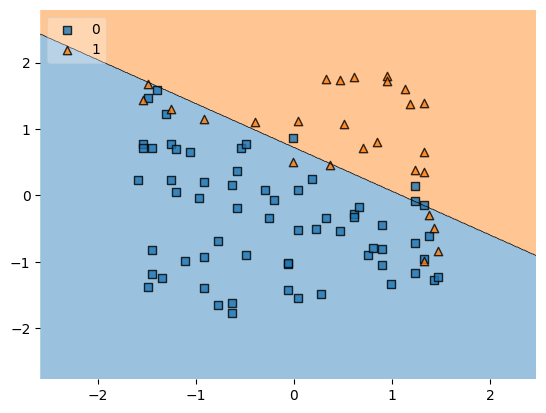

In [ ]:
plot_decision_regions(X_Train, Y_Train.values, clf=clf, legend = 2)

### Creating Exportable Package using Pickle

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('placement_pred_model.pkl', 'wb'))